<a href="https://colab.research.google.com/github/JDM-1609/IA-for-Engineers-Course---Notes/blob/main/NOTES%2003.02%20-%20SUPERVISED%20ALGORITHMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03.02 - SUPERVISED ALGORITHMS

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [ ]:
from sklearn.datasets import *
import numpy as np
from local.lib import mlutils
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

/content/local/lib/mlutils.py:445: SyntaxWarning: invalid escape sequence '\m'
  time_str = "fit time  (TRAIN)    %.2f $\mu$secs"%(fitting_time*1000)


## SUPERVISED ALGORITHMS

- We are given $X$ and $y$


In [ ]:
from sklearn.tree import DecisionTreeClassifier
X,y = make_moons(400, noise=0.1)   # Genera un Data set sintético para pruebas de algoritmos nuevos o aprender sobre el comportamiento del mismo
X.shape, y.shape # "X": Matriz de 400 elementos (filas) y 2 columnas, representa la entrada; "y": representa la salida esperada.
# Hay un valor de "y" para cada entrada de X, por lo que estamos frente a una tarea de clasificación de dos clases (0 y 1)

((400, 2), (400,))

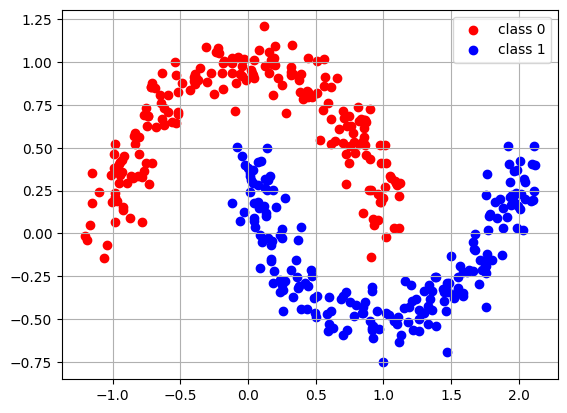

In [ ]:
# Grafica los datos que se tienen
plt.scatter(X[y==0][:,0], X[y==0][:,1], color="red", label="class 0")
plt.scatter(X[y==1][:,0], X[y==1][:,1], color="blue", label="class 1")
plt.legend();
plt.grid();

In [ ]:
X[:10]

array([[ 0.95144852,  0.50274799],
       [ 0.03682287,  0.08991459],
       [ 0.73081681,  0.7217708 ],
       [ 0.09433099, -0.05940453],
       [ 0.49704606,  0.94596266],
       [ 0.03293142,  0.23075117],
       [-0.13159455,  1.1698576 ],
       [-0.28744451,  0.87574026],
       [ 0.46832123, -0.18692712],
       [-0.14562525,  0.65176543]])

In [ ]:
y[:10]

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 0])

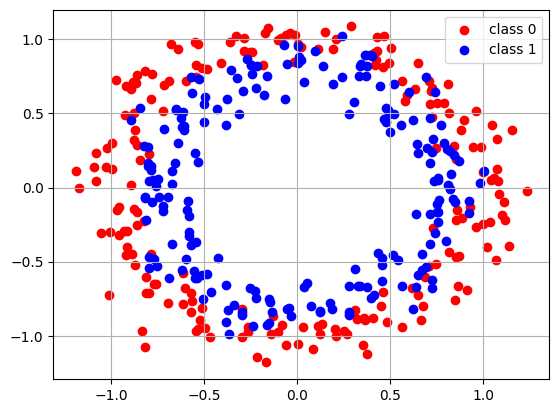

In [ ]:
from sklearn.tree import DecisionTreeClassifier
X2,y2 = make_circles(400, noise=0.1)

plt.scatter(X2[y2==0][:,0], X2[y2==0][:,1], color="red", label="class 0")
plt.scatter(X2[y2==1][:,0], X2[y2==1][:,1], color="blue", label="class 1")
plt.legend();
plt.grid();

**La elección del algoritmo a utilizar debe ser en base a la distribución de los datos.**

Por ejemplo, con los datos anteriores no tiene ningún sentido usar un algoritmo lineal como "Logistic Regression" ya que generaría una frontera líneal, y visualmente se sabe que la frontera debe ser circular.

## Clasificador Lineal

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() # Crea el modelo
lr.fit(X,y)  # Calibración del modelo ("Entrenamiento")
lr.score(X,y)  # Realiza las predicciones. Mide el % de acierto

0.885

In [ ]:
y[:20]  # Valores de salida o las predicciones esperadas del modelo

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0])

In [ ]:
Preds = lr.predict(X)
Preds[:20]  # Predicciones reales que da el modelo. En este caso, se compara "y" y "preds" para saber que tan acertadas fueron las predicciones

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0])

In [ ]:
Preds.shape

(400,)

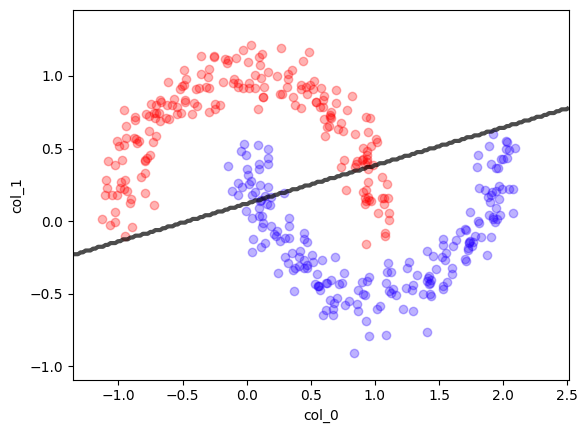

In [ ]:
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(lr.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
plt.xlabel("col_0"); plt.ylabel("col_1");

## Arboles de decision

In [ ]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X,y)
y_preds = dt.predict(X)
dt.score(X,y)

0.915

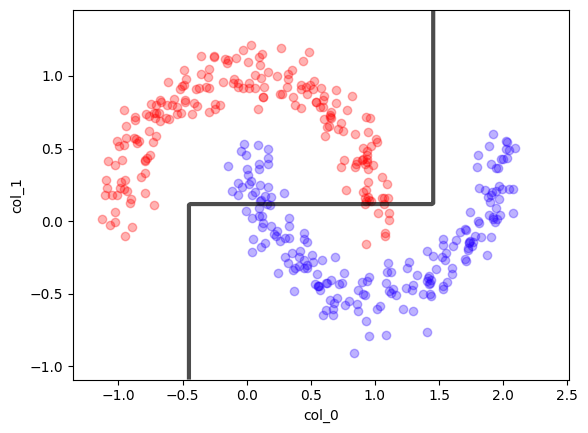

In [ ]:
## KEEPOUTPUT
dt = DecisionTreeClassifier(max_depth=3); dt.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
plt.xlabel("col_0"); plt.ylabel("col_1");

- **samples**: nb of data points in the split
- **value**: nb samples of each class in the split
- **class**: class assigned to the split (the majority class in **value**)

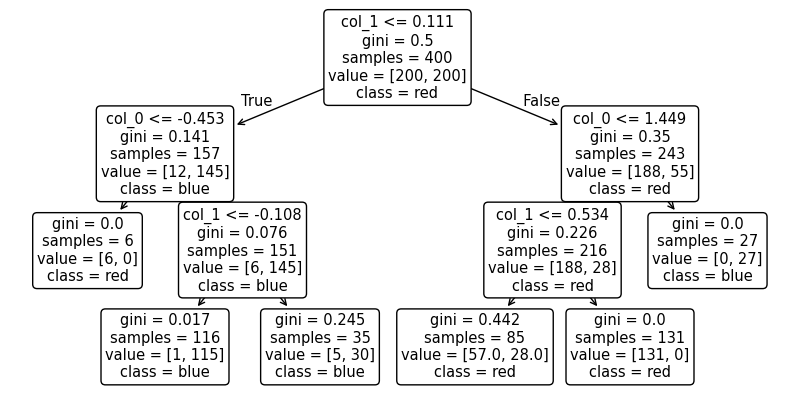

In [ ]:
## KEEPOUTPUT
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
plot_tree(dt, feature_names=["col_0", "col_1"], class_names=["red", "blue"], rounded=True);

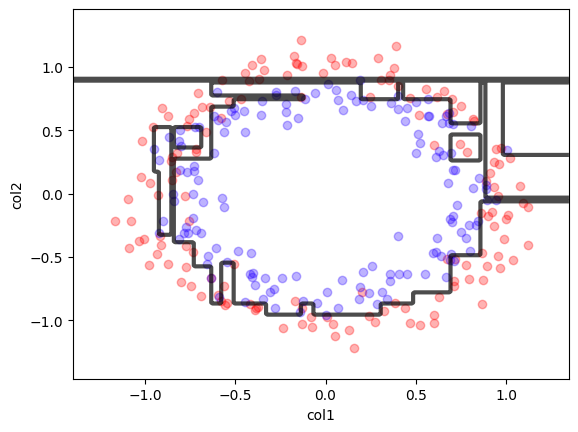

In [ ]:
## KEEPOUTPUT
dt = DecisionTreeClassifier(max_depth=10); # Aumentar el hyperparametro "max_depth" ocasiona mas complejidad en el modelo. Aumenta el numero de desiciones que evalua.
dt.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.xlabel("col1"); plt.ylabel("col2");

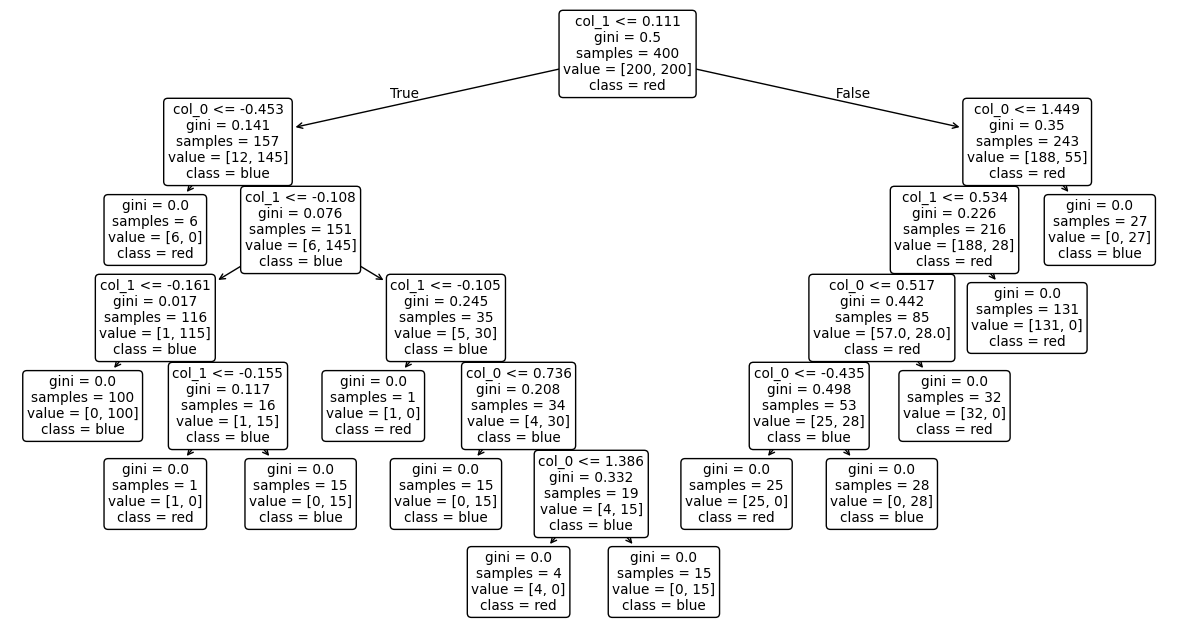

In [ ]:
## KEEPOUTPUT
plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=["col_0", "col_1"], class_names=["red", "blue"], rounded=True);

In [ ]:
X,y = make_circles(400, noise=0.05)

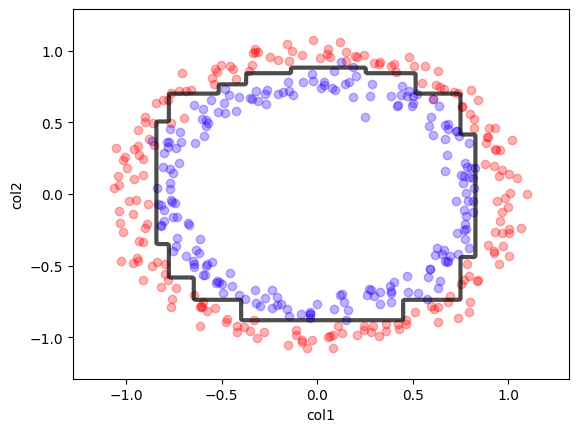

In [ ]:
## KEEPOUTPUT
dt = DecisionTreeClassifier(max_depth=10);
dt.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(dt.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)

plt.xlabel("col1"); plt.ylabel("col2");

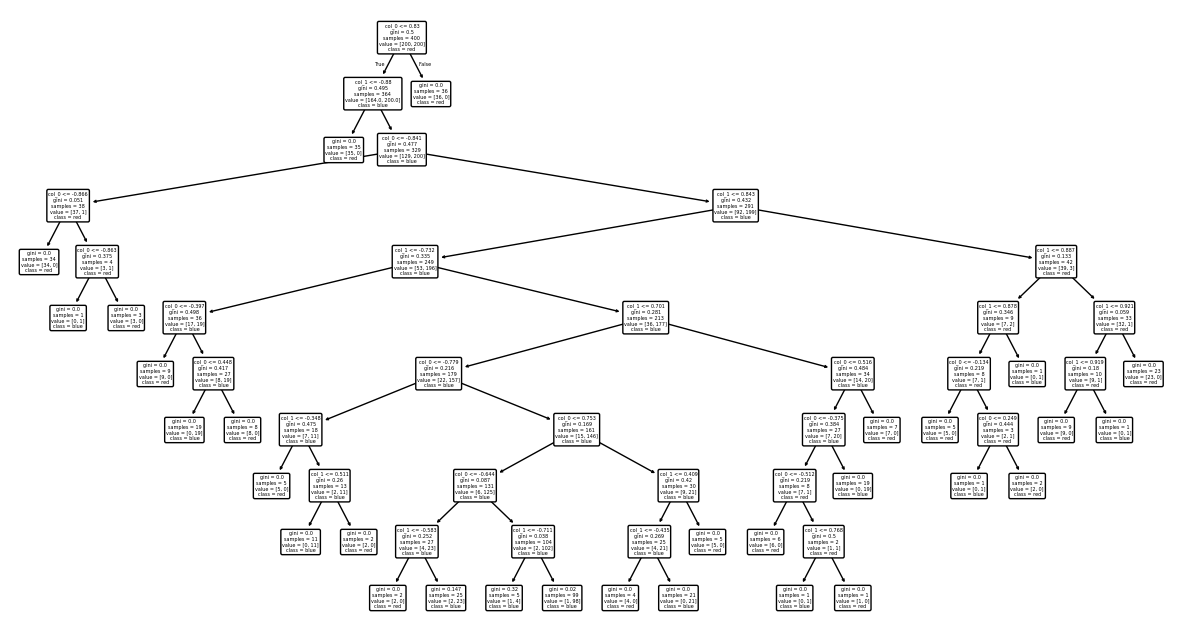

In [ ]:
## KEEPOUTPUT
plt.figure(figsize=(15,8))
plot_tree(dt, feature_names=["col_0", "col_1"], class_names=["red", "blue"], rounded=True);

## Random forests

0.99 0.99


(np.float64(0.62255), np.float64(0.37745))

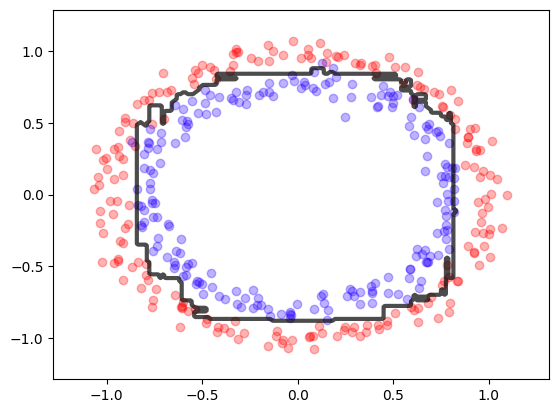

In [ ]:
# Modelo combina la clasificación de varios arboles de desicion distintos.
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, max_depth=10) #n_estimator: cantidad de arboles que utiliza con la profundidad determinada
rf.fit(X,y)
print (rf.score(X,y),rf.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(rf.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


1.0


(np.float64(0.6175), np.float64(0.3825))

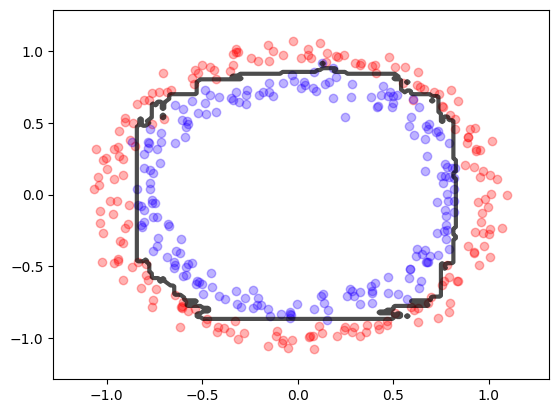

In [ ]:
## KEEPOUTPUT
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=10, n_estimators=100)
rf.fit(X,y)
print (rf.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(rf.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


## Naive Bayes

(np.float64(0.507), np.float64(0.493))

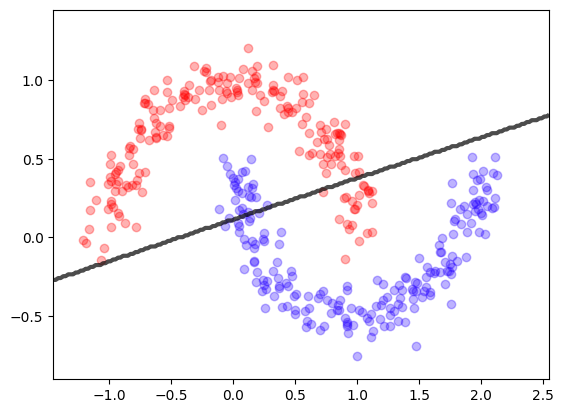

In [ ]:
## KEEPOUTPUT
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


(np.float64(0.6765), np.float64(0.3235))

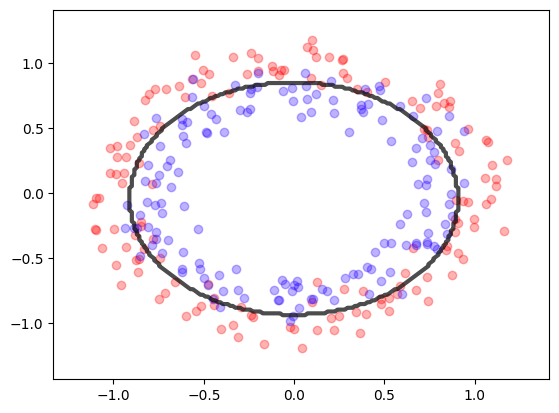

In [ ]:
# Este modelo asume que cada columna viene de una distribucion gaussiana distinta e independiente
X,y = make_circles(300, noise=.1)
gb = GaussianNB()
gb.fit(X,y)
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


(np.float64(0.463), np.float64(0.537))

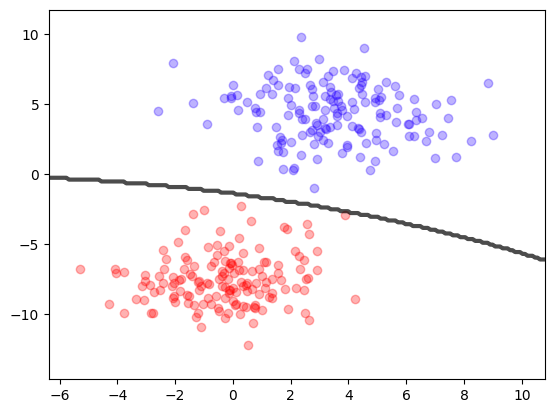

In [ ]:
## KEEPOUTPUT
X,y = make_blobs(300, centers=2, cluster_std=2)
#X, y = make_moons(400, noise=0.1)
gb = GaussianNB()
gb.fit(X,y)

mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)


observa que si alguna de las variables no es independiente el método falla

<>:8: SyntaxWarning: invalid escape sequence '\h'
<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\h'
<>:8: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-1425146874.py:8: SyntaxWarning: invalid escape sequence '\h'
  plt.title(" $\hat{\epsilon}=%.3f$"%mc.score(X,y)+"  $\epsilon=%.3f$"%mc.analytic_score());
/tmp/ipython-input-1425146874.py:8: SyntaxWarning: invalid escape sequence '\e'
  plt.title(" $\hat{\epsilon}=%.3f$"%mc.score(X,y)+"  $\epsilon=%.3f$"%mc.analytic_score());


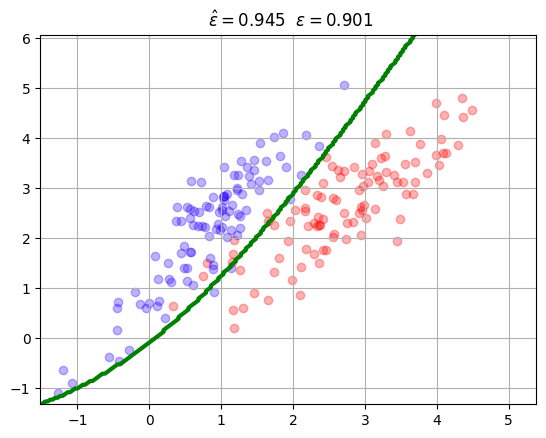

In [ ]:
## KEEPOUTPUT
mc = mlutils.Example_Bayes2DClassifier(mean0=[2.5, 2.5], cov0=[[.9, .9],
                                                               [0.8, 1.1]],
                                        mean1=[1, 2.5], cov1=[[0.5,.8],
                                                             [0.4,0.9]])
X,y = mc.sample(200)
mlutils.plot_2Ddata_with_boundary(mc.predict, X, y, line_width=3, line_color="green", dots_alpha=.3)
plt.title(" $\hat{\epsilon}=%.3f$"%mc.score(X,y)+"  $\epsilon=%.3f$"%mc.analytic_score());
plt.grid();


0.865


(np.float64(0.503825), np.float64(0.496175))

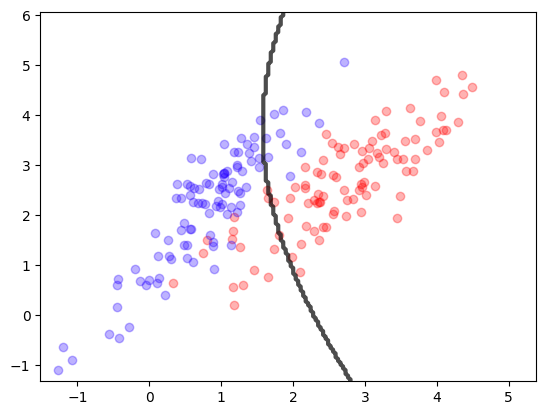

In [ ]:
## KEEPOUTPUT
gb.fit(X,y)
print (gb.score(X,y))
mlutils.plot_2Ddata(X, y, dots_alpha=.3)
mlutils.plot_2D_boundary(gb.predict, np.min(X, axis=0), np.max(X, axis=0),
                 line_width=3, line_alpha=.7, label=None)
